# TSA and Supply chain Analysis

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("all_agricultural_products_data.csv",encoding='ISO-8859-1')

In [11]:
df

,ticker,commodity,date,open,high,low,close,volume
0,CC=F,Cocoa,2000-01-03,840.00,846.000000,820.000000,830.000000,2426
1,CC=F,Cocoa,2000-01-04,830.00,841.000000,823.000000,836.000000,1957
2,CC=F,Cocoa,2000-01-05,840.00,850.000000,828.000000,831.000000,3975
3,CC=F,Cocoa,2000-01-06,830.00,847.000000,824.000000,841.000000,3454
4,CC=F,Cocoa,2000-01-07,848.00,855.000000,836.000000,853.000000,5008
...,...,...,...,...,...,...,...,...
30926,SB=F,Sugar,2024-06-17,19.32,19.320000,18.809999,18.980000,87484
30927,SB=F,Sugar,2024-06-18,18.93,19.190001,18.809999,18.920000,52594
30928,SB=F,Sugar,2024-06-20,19.10,19.430000,18.820000,18.889999,70520
30929,SB=F,Sugar,2024-06-21,18.92,19.059999,18.809999,18.969999,62108


In [13]:
df.isnull().sum()

ticker       0
commodity    0
date         0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

C:\Users\Hi\AppData\Local\Temp\ipykernel_664\4058573655.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="commodity", data=df, palette="hls")


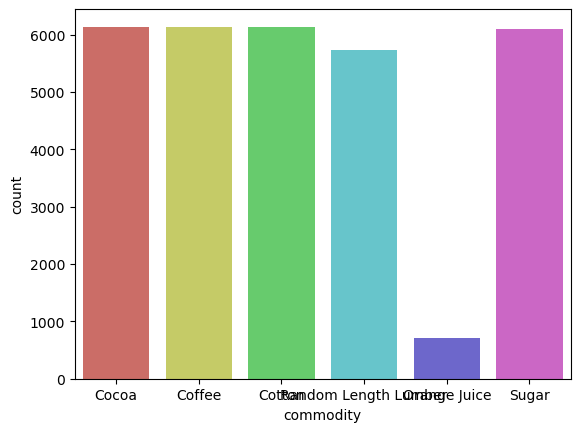

<Figure size 1300x700 with 0 Axes>

In [29]:
sns.countplot(x="commodity", data=df, palette="hls")
plt.figure(figsize=(13,7))
plt.tight_layout()
plt.show()

In [39]:
df['date'] = pd.to_datetime(df['date'])

In [41]:
commodities = df['commodity'].unique()


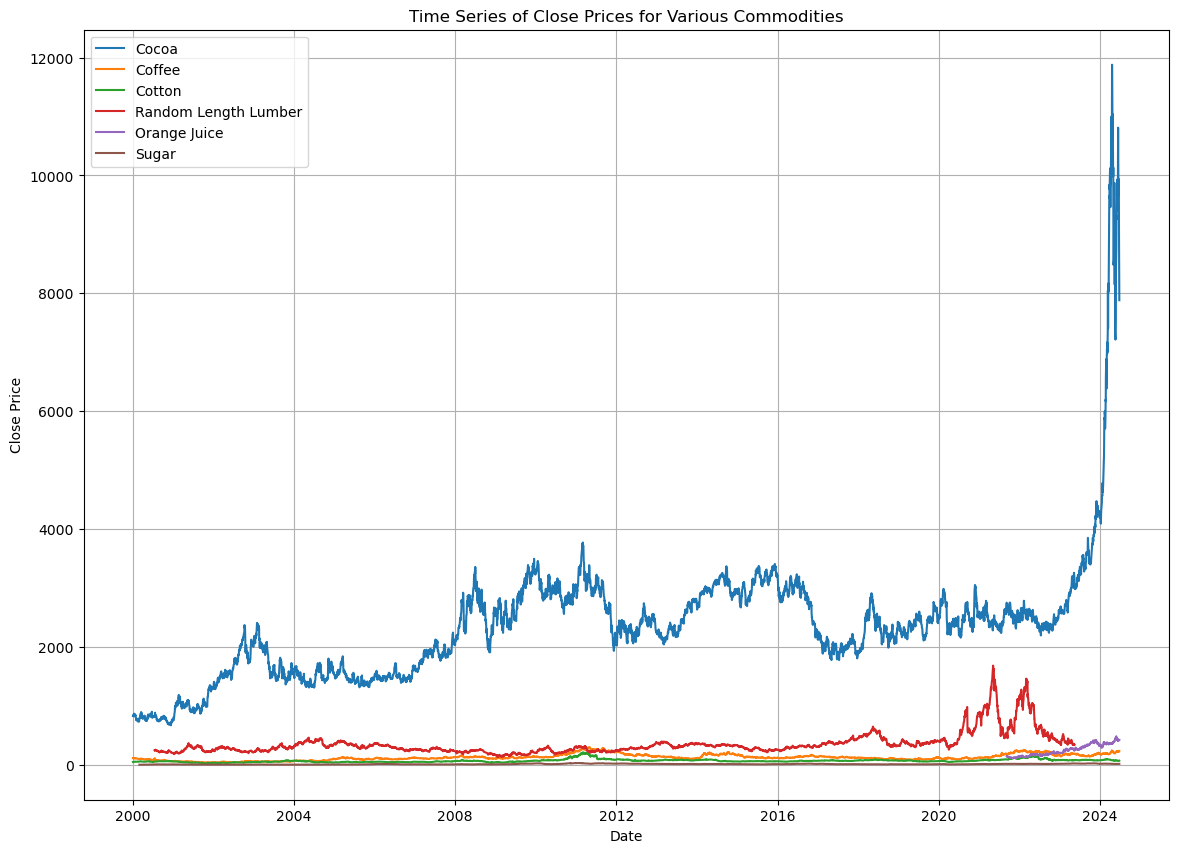

In [47]:
plt.figure(figsize=(14, 10))
for commodity in commodities:
    commodity_data = df[df['commodity'] == commodity]
    plt.plot(commodity_data['date'], commodity_data['close'], label=commodity)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series of Close Prices for Various Commodities')
plt.legend()
plt.grid(True)
plt.show()

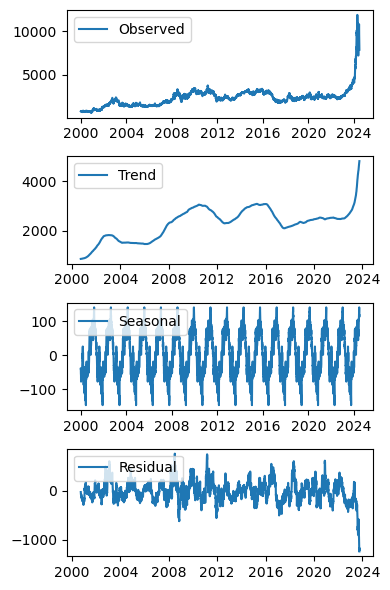

In [59]:
# Filter the data for Cocoa commodity
from statsmodels.tsa.seasonal import seasonal_decompose

cocoa_data = df[df['commodity'] == 'Cocoa']
cocoa_data.set_index('date', inplace=True)
cocoa_data = cocoa_data.sort_index()

# Perform seasonal decomposition
decomposition = seasonal_decompose(cocoa_data['close'], model='additive', period=365)

# Plot the seasonal decomposition
plt.figure(figsize=(4, 6))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

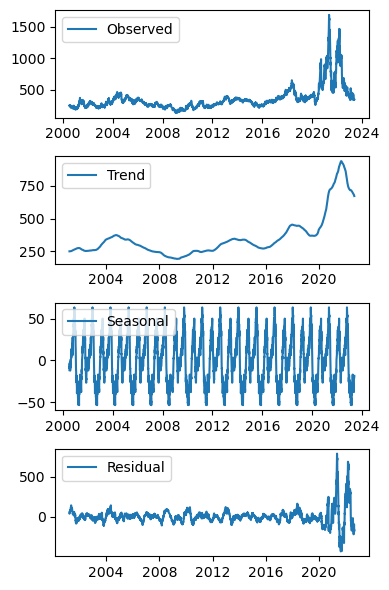

In [63]:
RLD_data = df[df['commodity'] == 'Random Length Lumber']
RLD_data.set_index('date', inplace=True)
RLD_data = RLD_data.sort_index()

# Perform seasonal decomposition
decomposition = seasonal_decompose(RLD_data['close'], model='additive', period=365)

# Plot the seasonal decomposition
plt.figure(figsize=(4, 6))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [65]:
df.head()

,ticker,commodity,date,open,high,low,close,volume
0,CC=F,Cocoa,2000-01-03,840.0,846.0,820.0,830.0,2426
1,CC=F,Cocoa,2000-01-04,830.0,841.0,823.0,836.0,1957
2,CC=F,Cocoa,2000-01-05,840.0,850.0,828.0,831.0,3975
3,CC=F,Cocoa,2000-01-06,830.0,847.0,824.0,841.0,3454
4,CC=F,Cocoa,2000-01-07,848.0,855.0,836.0,853.0,5008


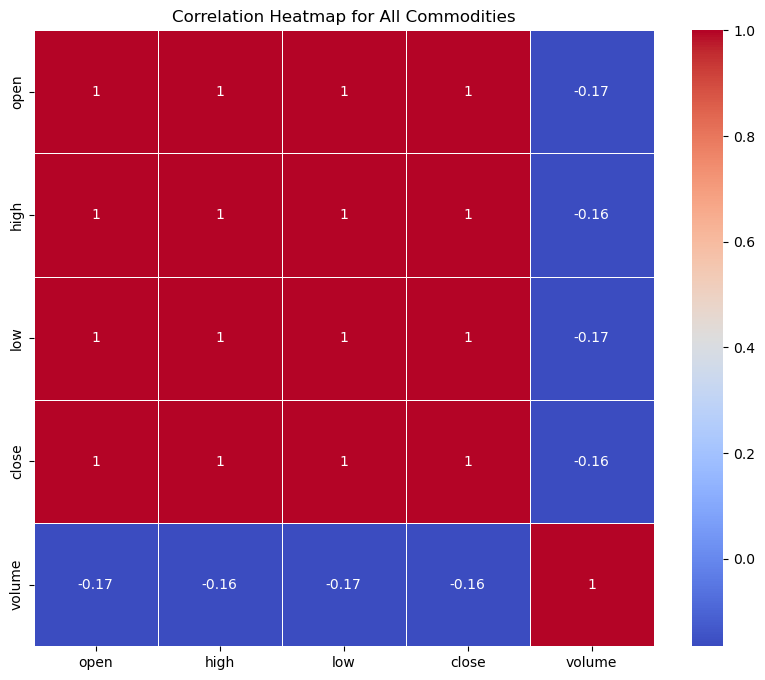

In [71]:
# Compute the correlation matrix for all commodities
corr_matrix = df[['open', 'high', 'low', 'close', 'volume']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for All Commodities')
plt.show()

# High Correlation Between Price Variables:
### The open, high, low, and close prices show strong positive correlations with each other. This indicates that these prices tend to move together. For example, when the opening price is high, the closing price is also likely to be high, and similar relationships hold for high and low prices throughout the trading period.

# Volume and Price Relationship:
### The trading volume shows weaker correlations with the open, high, low, and close prices compared to the correlations among the price variables themselves. This suggests that the volume of trades does not have a strong linear relationship with price movements.

# Predictive Analytics:

### Given the high correlation between different price points (open, high, low, close), predictive models can be designed with a focus on these variables to predict future prices based on historical data. Such models can be valuable for traders and investors aiming to optimize their trading strategies.



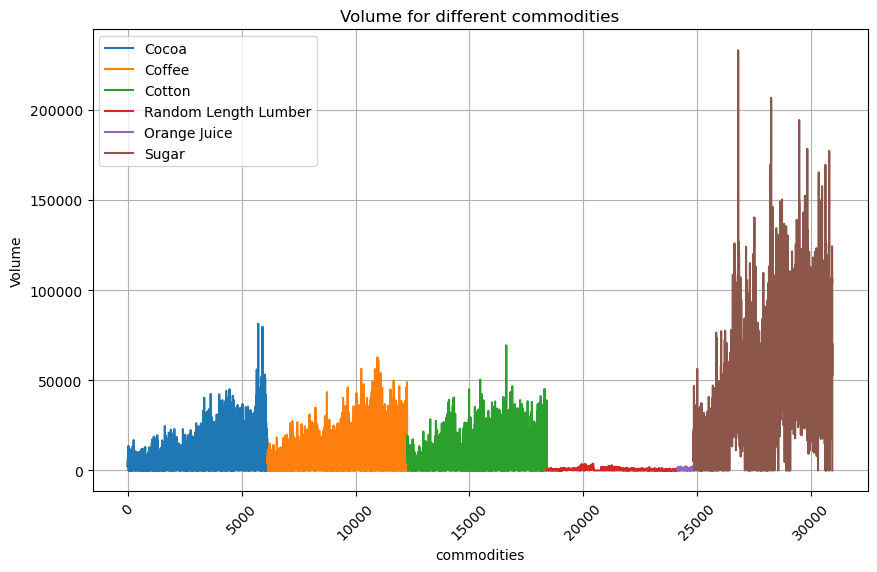

In [75]:
product_column = 'commodity'
sales_column = 'volume'

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Iterate through unique products and plot sales
for Product in df[product_column].unique():
    Product_data = df[df[product_column] == Product]
    plt.plot(Product_data[sales_column], label=Product)

plt.xlabel('commodities')  # Change this based on your dataset
plt.ylabel('Volume')
plt.title('Volume for different commodities')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

#  Price Forecasting with ARIMA

In [78]:
#ARIMA FORECASTING MODEL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [82]:
# Make sure 'Date' is in datetime format
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Feature engineering: Create lag features
df['lag1'] = df['close'].shift(1)
df['lag2'] = df['close'].shift(2)

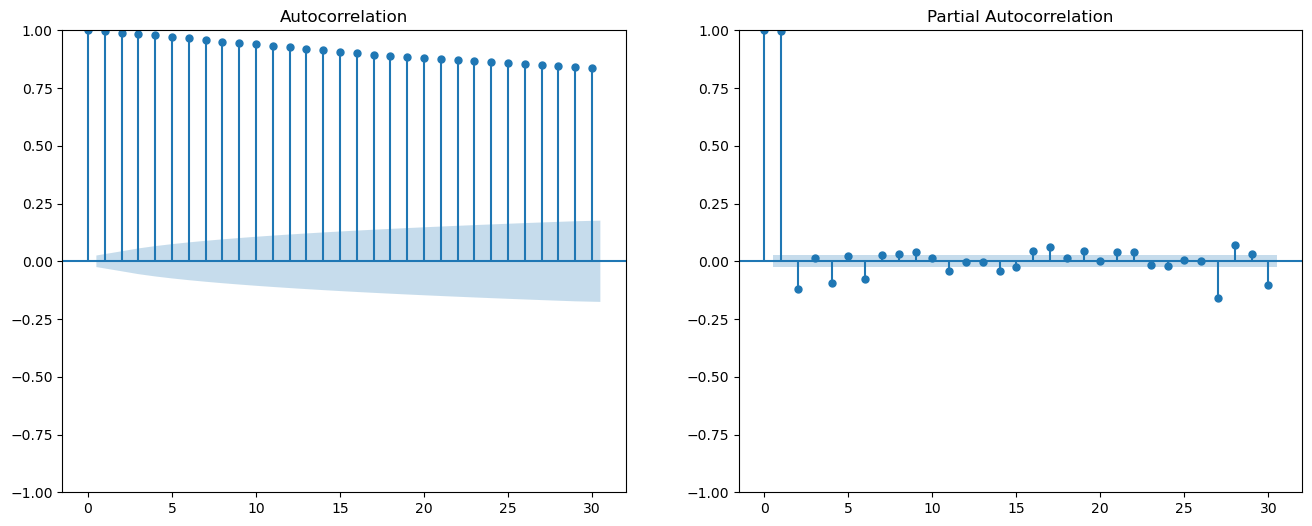

In [100]:
# Plot the ACF and PACF to determine the p and q parameters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(cocoa_data['close'], lags=30, ax=axes[0])
plot_pacf(cocoa_data['close'], lags=30, ax=axes[1])
plt.show()

In [102]:
# Fit the ARIMA model (initial guess: ARIMA(2, 1, 2))
model = ARIMA(cocoa_data['close'], order=(2, 1, 2))
fitted_model = model.fit()



C:\Users\Hi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [104]:
# Print the model summary
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 6137
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -34893.833
Date:                Wed, 17 Jul 2024   AIC                          69797.666
Time:                        15:37:31   BIC                          69831.276
Sample:                             0   HQIC                         69809.325
                               - 6137                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7678      0.033    -23.409      0.000      -0.832      -0.704
ar.L2         -0.2200      0.023     -9.364      0.000      -0.266      -0.174
ma.L1          0.8398      0.034     25.027      0.0

C:\Users\Hi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Hi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


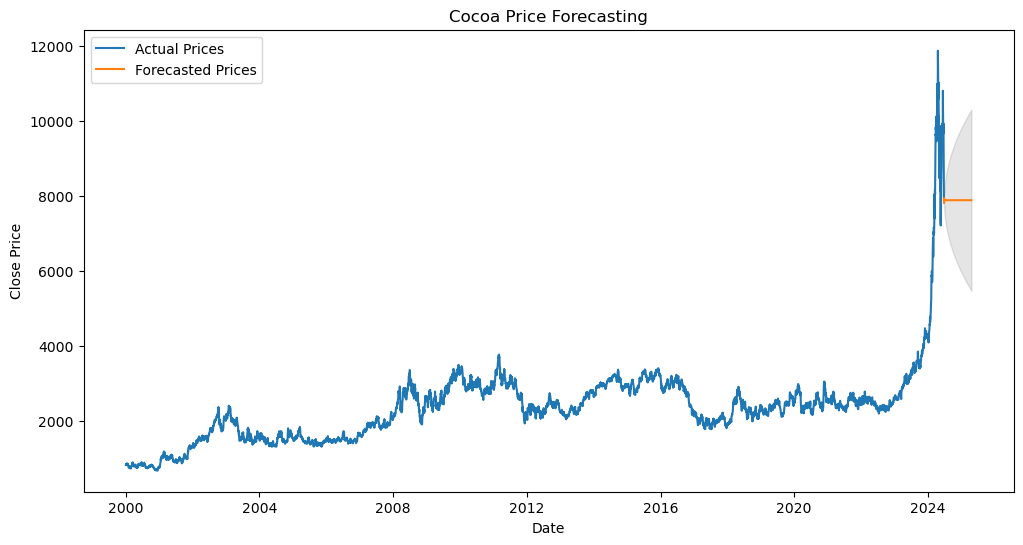

In [120]:
# Forecast future prices
forecast_steps = 300  # Number of days to forecast
forecast = fitted_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=cocoa_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Plot the forecasted prices along with the actual prices
plt.figure(figsize=(12, 6))
plt.plot(cocoa_data['close'], label='Actual Prices')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecasted Prices')
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='k', alpha=0.1)
plt.title('Cocoa Price Forecasting')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Supply Chain Analysis:## 
Correlation Matrix for each commodity for analyzing relation between the features

In [144]:
import seaborn as sns
commodities = df['commodity'].unique()
# Calculate and visualize correlation coefficients for each commodity
for commodity in commodities:
    commodity_data = df[df['commodity'] == commodity]
    correlations = commodity_data.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for {commodity} Prices and Features')
    plt.show()

ValueError: could not convert string to float: 'CC=F'

In [136]:
df.describe()

,open,high,low,close,volume,lag1,lag2
count,30931.000000,30931.000000,30931.000000,30931.000000,30931.000000,30930.000000,30929.000000
mean,583.777636,590.417521,577.307662,583.800294,14145.303029,583.818541,583.836804
std,1017.162676,1031.166787,1004.080039,1018.151325,21296.520023,1018.162727,1018.174121
min,4.960000,5.060000,4.940000,4.960000,0.000000,4.960000,4.960000
25%,54.490000,55.000000,53.950001,54.485001,199.000000,54.490002,54.490002
50%,128.449997,129.750000,126.900002,128.149994,5462.000000,128.149994,128.149994
75%,370.200012,375.000000,365.675003,370.399994,18867.500000,370.399994,370.399994
max,11967.000000,12261.000000,11132.000000,11878.000000,232949.000000,11878.000000,11878.000000


In [138]:
# Assuming 'date' is your date column
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['season'] = (df.index.month % 12 + 3) // 3  # Calculate season (assuming 3-month seasons)
df['lag1'] = df['close'].shift(1)  # Lag feature for one time step
df['lag2'] = df['close'].shift(2)  # Lag feature for two time steps

In [140]:
df


,ticker,commodity,open,high,low,close,volume,lag1,lag2,day_of_week,month,season
date,,,,,,,,,,,,
2000-01-03,CC=F,Cocoa,840.00,846.000000,820.000000,830.000000,2426,NaN,NaN,0,1,1
2000-01-04,CC=F,Cocoa,830.00,841.000000,823.000000,836.000000,1957,830.000000,NaN,1,1,1
2000-01-05,CC=F,Cocoa,840.00,850.000000,828.000000,831.000000,3975,836.000000,830.000000,2,1,1
2000-01-06,CC=F,Cocoa,830.00,847.000000,824.000000,841.000000,3454,831.000000,836.000000,3,1,1
2000-01-07,CC=F,Cocoa,848.00,855.000000,836.000000,853.000000,5008,841.000000,831.000000,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-17,SB=F,Sugar,19.32,19.320000,18.809999,18.980000,87484,19.430000,19.590000,0,6,3
2024-06-18,SB=F,Sugar,18.93,19.190001,18.809999,18.920000,52594,18.980000,19.430000,1,6,3
2024-06-20,SB=F,Sugar,19.10,19.430000,18.820000,18.889999,70520,18.920000,18.980000,3,6,3
